In [19]:
!pip install seaborn

You should consider upgrading via the 'c:\users\arabae\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


In [2]:
import json
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

In [15]:
fm.get_fontconfig_fonts()
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = [15, 5]


In [3]:
data_dir = './data'
train_data_file = f'{data_dir}/train_dataset/train_dials.json'
test_data_file = f'{data_dir}/eval_dataset/eval_dials.json'
train_slot_file = f'{data_dir}/train_dataset/slot_meta.json'
test_slot_file = f'{data_dir}/eval_dataset/slot_meta.json'
ontology_file = f'{data_dir}/train_dataset/ontology.json'

# Train data

In [4]:
with open(train_data_file, 'r', encoding='UTF-8') as f:
    train_data = json.load(f)
with open(train_slot_file, 'r', encoding='UTF-8') as f:
    train_slot = json.load(f)

In [5]:
print('Number of samples: ', len(train_data))

Number of samples:  7000


In [6]:
train_domain_cnt = {train_slot[i].split('-')[0]:0 for i in range(len(train_slot))}
print('Domain 종류: ', list(train_domain_cnt.keys()))

Domain 종류:  ['관광', '숙소', '식당', '지하철', '택시']


In [7]:
for t in train_data:
    for d in t['domains']:
        train_domain_cnt[d] +=1
print('Train data의 각 domain 개수:', train_domain_cnt)

Train data의 각 domain 개수: {'관광': 3732, '숙소': 3802, '식당': 4020, '지하철': 650, '택시': 2374}


## 1) WoS의 domain 종류 별 sample 수 확인

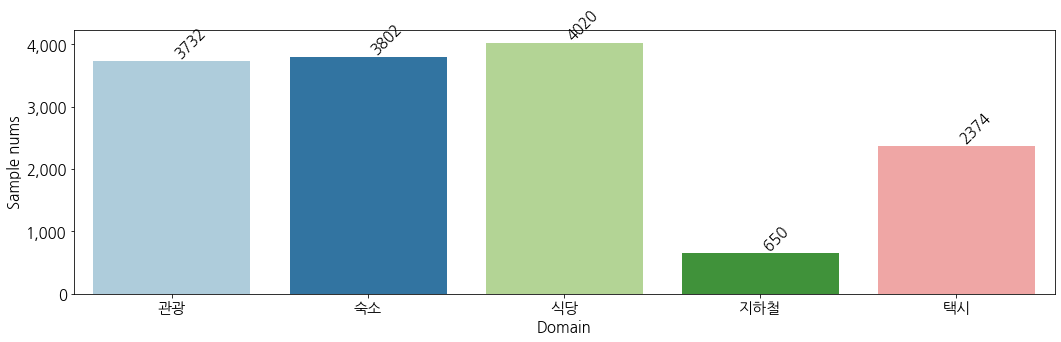

In [72]:
train_domain_info = list(train_domain_cnt.keys())
train_domain_num = list(train_domain_cnt.values())

ax = sns.barplot(x=train_domain_info, y=train_domain_num, palette='Paired')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Domain", ylabel='Sample nums')

# add proper Dim values as x labels
ax.set_xticklabels(train_domain_info)
for i, v in enumerate(train_domain_num):
    ax.text(i ,v, "{}".format(v), color='k', va ='bottom', rotation=45)
plt.tight_layout()
plt.show()

## 2) WoS Slot과 Domain 별 Slot 확인

In [17]:
print('Number of slots: ', len(train_slot))

Number of slots:  45


In [18]:
domain_slot = {k:[] for k in train_domain_info}
for i in range(len(train_slot)):
    domain = train_slot[i].split('-')[0]
    domain_slot[domain].append(train_slot[i])

for k, v in domain_slot.items():
    print(f'------ Domain: {k} ------')
    print('|| ', end='')
    for s in v:
        print(s, end=' || ')
    print()
    print()


------ Domain: 관광 ------
|| 관광-경치 좋은 || 관광-교육적 || 관광-도보 가능 || 관광-문화 예술 || 관광-역사적 || 관광-이름 || 관광-종류 || 관광-주차 가능 || 관광-지역 || 

------ Domain: 숙소 ------
|| 숙소-가격대 || 숙소-도보 가능 || 숙소-수영장 유무 || 숙소-스파 유무 || 숙소-예약 기간 || 숙소-예약 명수 || 숙소-예약 요일 || 숙소-이름 || 숙소-인터넷 가능 || 숙소-조식 가능 || 숙소-종류 || 숙소-주차 가능 || 숙소-지역 || 숙소-헬스장 유무 || 숙소-흡연 가능 || 

------ Domain: 식당 ------
|| 식당-가격대 || 식당-도보 가능 || 식당-야외석 유무 || 식당-예약 명수 || 식당-예약 시간 || 식당-예약 요일 || 식당-이름 || 식당-인터넷 가능 || 식당-종류 || 식당-주류 판매 || 식당-주차 가능 || 식당-지역 || 식당-흡연 가능 || 

------ Domain: 지하철 ------
|| 지하철-도착지 || 지하철-출발 시간 || 지하철-출발지 || 

------ Domain: 택시 ------
|| 택시-도착 시간 || 택시-도착지 || 택시-종류 || 택시-출발 시간 || 택시-출발지 || 



## 3) WoS의 Value와 Slot당 Value 확인

In [19]:
with open(ontology_file, 'r', encoding='UTF-8') as f:
    ontology = json.load(f)

In [21]:
slot_ontology = {s:len(ontology[s]) for s in train_slot}

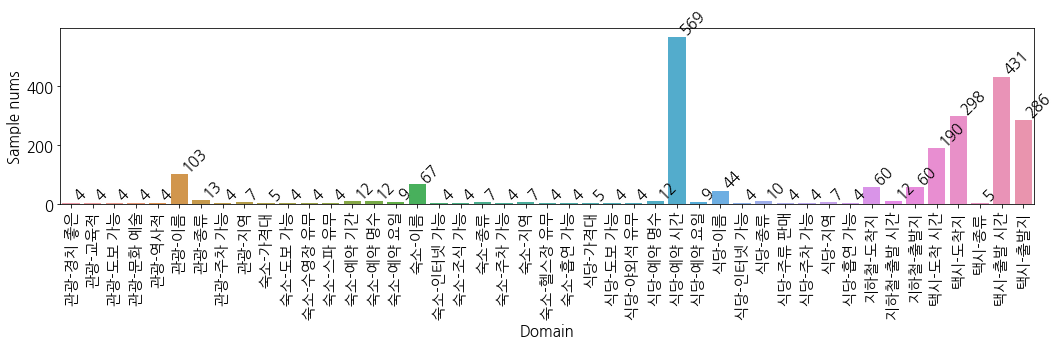

In [24]:
train_slots = list(slot_ontology.keys())
train_ontologys = list(slot_ontology.values())

ax2 = sns.barplot(x=train_slots, y=train_ontologys)
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax2.set(xlabel="Domain", ylabel='Sample nums')

# add proper Dim values as x labels
ax2.set_xticklabels(train_slots, rotation=90)
for i, v in enumerate(train_ontologys):
    ax2.text(i ,v, "{}".format(v), color='k', va ='bottom', rotation=45)
plt.tight_layout()
plt.show()

### Graph로 그려보기

In [ ]:
!pip install networkx
!pip install pyvis

In [59]:
import networkx as nx
from pyvis.network import Network

g = Network(notebook=True)
nxg = nx.DiGraph({'숙소-이름':ontology['숙소-이름']})
g.from_nx(nxg)
g.show('숙소-이름.html')

In [101]:
t = train_data[0]
train_value_num = {s:0 for s in train_slot}
for t in train_data:
    for d in t['dialogue']:
        if d['role'] == 'user':
            final_state = d['state']
    for f in final_state:
        pr_slot = f.split('-')[0] + '-' + f.split('-')[1]
        train_value_num[pr_slot] +=1


{'관광-경치 좋은': 347, '관광-교육적': 172, '관광-도보 가능': 29, '관광-문화 예술': 166, '관광-역사적': 704, '관광-이름': 3575, '관광-종류': 3079, '관광-주차 가능': 323, '관광-지역': 3081, '숙소-가격대': 3405, '숙소-도보 가능': 138, '숙소-수영장 유무': 77, '숙소-스파 유무': 477, '숙소-예약 기간': 3673, '숙소-예약 명수': 3674, '숙소-예약 요일': 3673, '숙소-이름': 3785, '숙소-인터넷 가능': 409, '숙소-조식 가능': 307, '숙소-종류': 3404, '숙소-주차 가능': 461, '숙소-지역': 3403, '숙소-헬스장 유무': 317, '숙소-흡연 가능': 375, '식당-가격대': 3380, '식당-도보 가능': 57, '식당-야외석 유무': 513, '식당-예약 명수': 3827, '식당-예약 시간': 3829, '식당-예약 요일': 3830, '식당-이름': 4002, '식당-인터넷 가능': 173, '식당-종류': 3377, '식당-주류 판매': 435, '식당-주차 가능': 338, '식당-지역': 3377, '식당-흡연 가능': 319, '지하철-도착지': 649, '지하철-출발 시간': 121, '지하철-출발지': 649, '택시-도착 시간': 1063, '택시-도착지': 2374, '택시-종류': 2374, '택시-출발 시간': 2374, '택시-출발지': 2373}


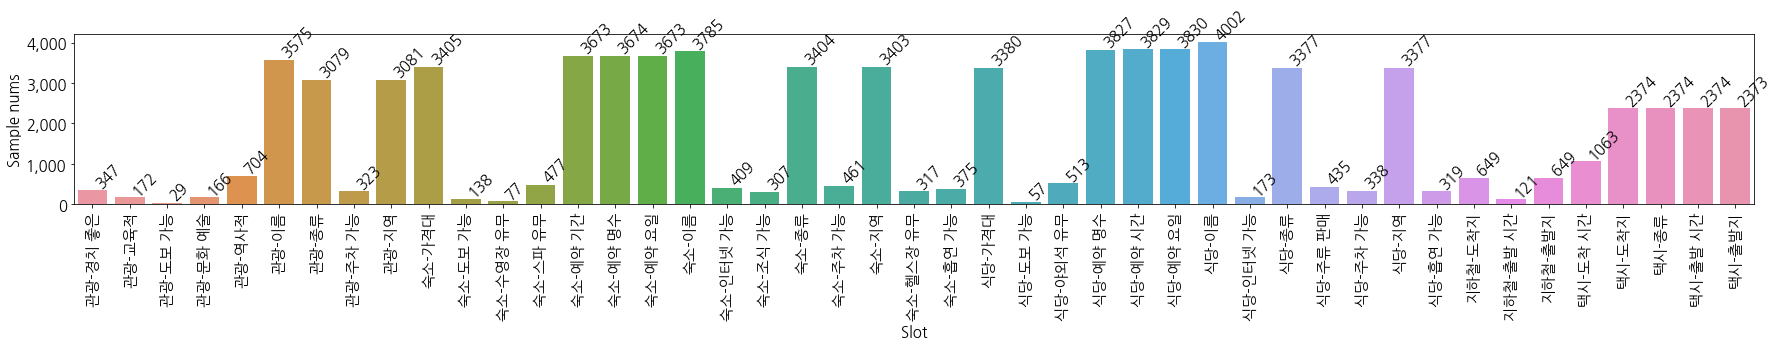

In [105]:
plt.rcParams['figure.figsize'] = [25, 5]

train_values = list(train_value_num.values())

ax3 = sns.barplot(x=train_slots, y=train_values)
ax3.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax3.set(xlabel="Slot", ylabel='Sample nums')

# add proper Dim values as x labels
ax3.set_xticklabels(train_slots, rotation=90)
for i, v in enumerate(train_values):
    ax3.text(i ,v, "{}".format(v), color='k', va ='bottom', rotation=45)
plt.tight_layout()
plt.show()

## 4) Domain별로 자주 사용되는 Bigram과 Trigram 확인

In [106]:
!pip install nltk

You should consider upgrading via the 'c:\users\arabae\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


In [112]:
import nltk
from nltk import bigrams, word_tokenize
from nltk.util import ngrams

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AraBae\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [ ]:
t = train_data[0]
train_value_num = {s:0 for s in train_slot}
for t in train_data:
    for d in t['dialogue']:
        print(d['text'])
    

# Evaluation data

In [66]:
with open(test_data_file, 'r', encoding='UTF-8') as f:
    test_data = json.load(f)

In [67]:
with open(test_slot_file, 'r', encoding='UTF-8') as f:
    test_slot = json.load(f)

In [68]:
print('Number of samples: ', len(test_data))

Number of samples:  2000


In [69]:
domain_cnt = {test_slot[i].split('-')[0]:0 for i in range(len(test_slot))}
print('Domain 종류: ', list(domain_cnt.keys()))

Domain 종류:  ['관광', '숙소', '식당', '지하철', '택시']


In [78]:
for t in test_data:
    for d in t['domains']:
        domain_cnt[d] +=1
print('Test data의 각 domain 개수:', domain_cnt)

Test data의 각 domain 개수: {'관광': 1141, '숙소': 1261, '식당': 1307, '지하철': 291, '택시': 568}


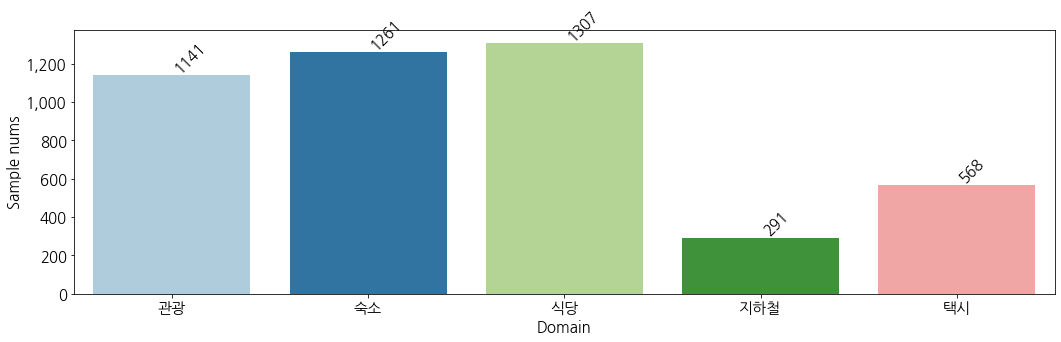

In [79]:
plt.rcParams['figure.figsize'] = [15, 5]

domain_info = list(domain_cnt.keys())
domain_num = list(domain_cnt.values())

ax4 = sns.barplot(x=domain_info, y=domain_num, palette='Paired')
ax4.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax4.set(xlabel="Domain", ylabel='Sample nums')
# add proper Dim values as x labels
ax4.set_xticklabels(domain_info)
for i, v in enumerate(domain_num):
    ax4.text(i ,v, "{}".format(v), color='k', va ='bottom', rotation=45)
plt.tight_layout()
plt.show()